# Kalman filtering benchmark 

### Import packages

In [5]:
import logging
import matplotlib.pyplot as plt

from logger import logger
from utils import loadtif, savetif, get_stack_baseline
from stackviewers import view, dualview
from plt_utils import plot_stack_summary
from kalman import KalmanDenoiser

logger.setLevel(logging.INFO)

### Load raw image stack

In [17]:
fpath = '../../data/misc/insulinoma_raw.tif'

 13/10/2021 12:05:14: loaded (100, 256, 170) uint8 stack from "../../data/misc/insulinoma_raw.tif"
 13/10/2021 12:05:14: stack size: (90, 256, 170)
 13/10/2021 12:05:14: rendering stack view...


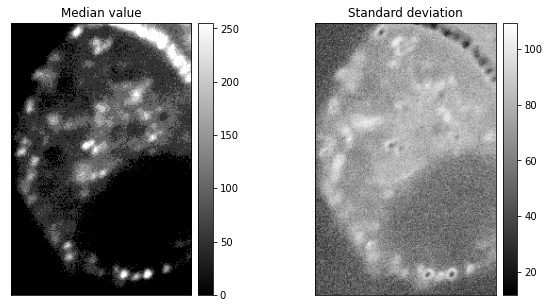

In [18]:
stack = loadtif(fpath)
stack = stack / stack.max() * 255
stack = stack[10:]
fig = plot_stack_summary(stack)
view(stack, title='Raw')

### Generate and visualize padding baseline

 13/10/2021 12:05:41: constructing 10-frames baseline from 90-frames stack...
 13/10/2021 12:05:41: stack size: (10, 256, 170)
 13/10/2021 12:05:41: rendering stack view...


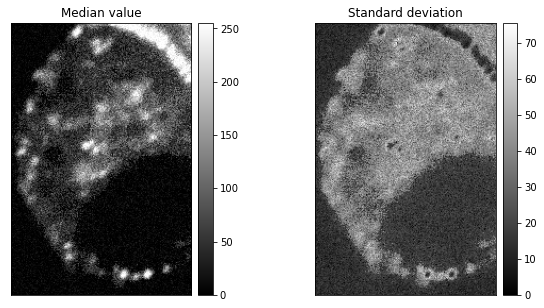

In [21]:
npad = 10
baseline = get_stack_baseline(stack, npad)
fig = plot_stack_summary(baseline)
view(baseline)

### Apply Kalman filtering and compare outputs

 13/10/2021 12:05:48: constructing 10-frames baseline from 90-frames stack...
 13/10/2021 12:05:49: filtering 90-frames stack with KalmanDenoiser(gain=0.8, var=0.5, npad=10)


100%|██████████| 99/99 [00:00<00:00, 6059.89it/s]

 13/10/2021 12:05:49: stack size: (90, 256, 170)
 13/10/2021 12:05:49: rendering stacks view...


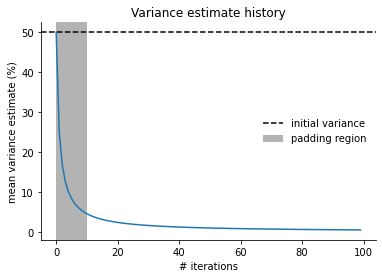

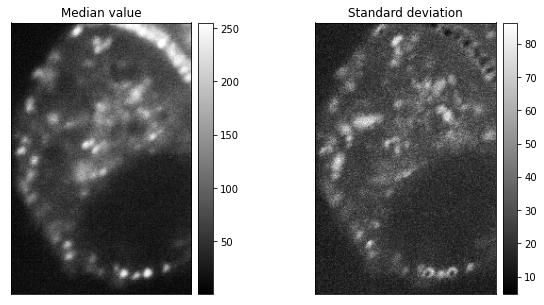

In [23]:
gain = 0.8
variance = 0.5
npad = 10
kd = KalmanDenoiser(G=gain, V=variance, npad=npad)
filtered_stack, ex_history = kd.filter(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history);
fig2 = plot_stack_summary(filtered_stack);
dualview(stack, filtered_stack, title1='Raw', title2='Filtered', suptitle=kd)